# Assignment 3

You only need to write one line of code for each question. When answering questions that ask you to identify or interpret something, the length of your response doesn’t matter. For example, if the answer is just ‘yes,’ ‘no,’ or a number, you can just give that answer without adding anything else.

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that **no outside searches are required by the assignment!**). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Clustering and Resampling

Let's set up our workspace and use the **Iris dataset** from `scikit-learn`. This dataset is a classic dataset in machine learning and statistics, widely used for clustering tasks. It consists of many samples of iris flowers. Here are the key features and characteristics of the dataset:

##### Features:
1. **Sepal Length**: The length of the sepal in centimeters.
2. **Sepal Width**: The width of the sepal in centimeters.
3. **Petal Length**: The length of the petal in centimeters.
4. **Petal Width**: The width of the petal in centimeters.

In [1]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


#### **Question 1:** 
#### Data inspection

#### Load the Iris dataset:

Use scikit-learn to load the Iris dataset and convert it into a Pandas DataFrame.
Display the first few rows of the dataset. How many observations (rows) and features (columns) does the dataset contain?

In [2]:
from sklearn.datasets import load_iris
# Load the Iris dataset
iris_data = load_iris()

In [3]:
# Convert to DataFrame
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)


In [4]:
# Display the DataFrame
print(iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [6]:
# Display the first few rows of the dataset

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


The dataset contains  150 rows and 4 columns

#### **Question 2:** 
#### Data-visualization

Let's create plots to visualize the relationships between the features (sepal length, sepal width, petal length, petal width).


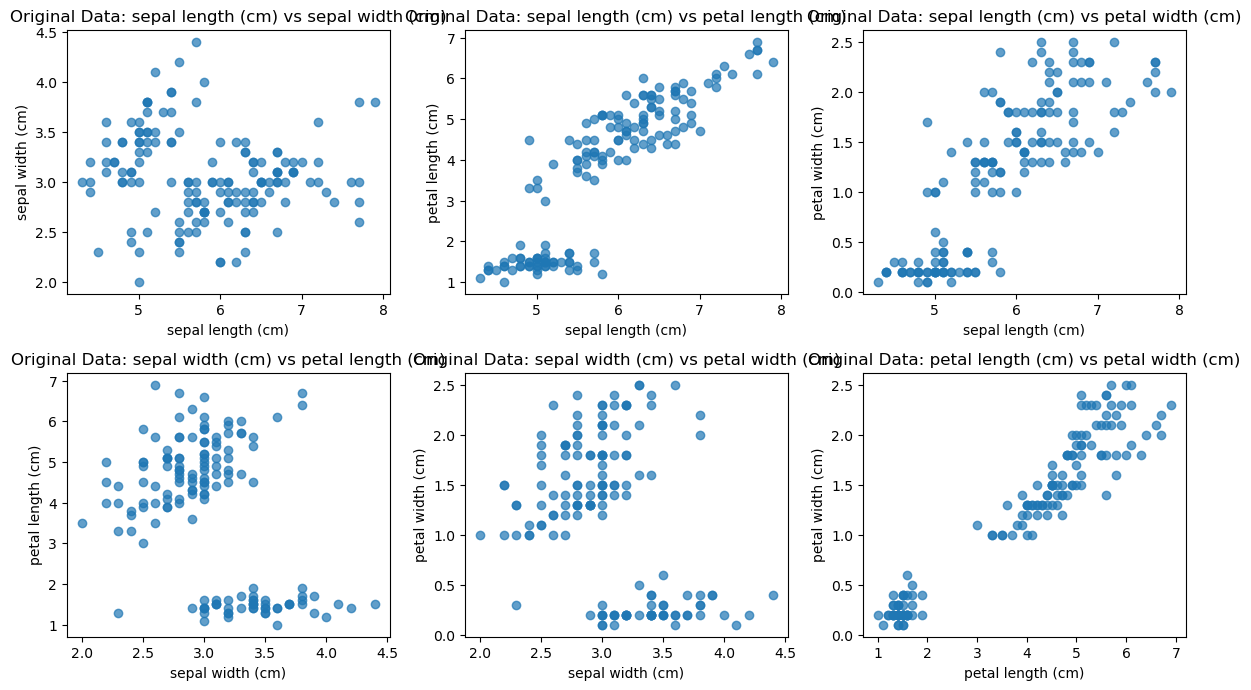

In [8]:
def plot_feature_pairs(data, feature_names, color_labels=None, title_prefix=''):
    """
    Helper function to create scatter plots for all possible pairs of features.
    
    Parameters:
    - data: DataFrame containing the features to be plotted.
    - feature_names: List of feature names to be used in plotting.
    - color_labels: Optional. Cluster or class labels to color the scatter plots.
    - title_prefix: Optional. Prefix for plot titles to distinguish between different sets of plots.
    """
    # Create a figure for the scatter plots
    plt.figure(figsize=(12, 10))
    
    # Counter for subplot index
    plot_number = 1
    
    # Loop through each pair of features
    for i in range(len(feature_names)):
        for j in range(i + 1, len(feature_names)):
            plt.subplot(len(feature_names)-1, len(feature_names)-1, plot_number)
            
            # Scatter plot colored by labels if provided
            if color_labels is not None:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], 
                            c=color_labels, cmap='viridis', alpha=0.7)
            else:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], alpha=0.7)
            
            plt.xlabel(feature_names[i])
            plt.ylabel(feature_names[j])
            plt.title(f'{title_prefix}{feature_names[i]} vs {feature_names[j]}')
            
            # Increment the plot number
            plot_number += 1

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

# Get feature names
feature_names = iris_df.columns

# Use the helper function to plot scatter plots without coloring by cluster labels
plot_feature_pairs(iris_df, feature_names, title_prefix='Original Data: ')

**Question:**
- Do you notice any patterns or relationships between the different features? How might these patterns help in distinguishing between different species?

> From the plots , we can figure the petal width and petal length has a clear positive linear relationship. As the petal length increase, the petal width increase. We can use the petal length to predict the petal width. From the overall patterns, it looks like there are at least two groups exist. One of the group  has extra small petal compare to the other.  If the species are clustered accroding to the petal width and petal length , we might be able to predict the species through that.

#### **Question 3:** 
#### Data cleaning

In [9]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale all the features in the dataset
scaled_features = scaler.fit_transform(iris_df)

# Create a new DataFrame with scaled features
scaled_iris_df = pd.DataFrame(scaled_features, columns=iris_data.feature_names)

# Display the first few rows of the scaled DataFrame
print(scaled_iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


Why is it important to standardize the features of a dataset before applying clustering algorithms like K-Means? Discuss the implications of using unstandardized data in your analysis.

K-Means is an algorithm that relies on distance calculation. To standrdize the features is to prevent any single feature with extra large range and dominate the training when running the model. We scaled the features to have a mean of 0 and standard deviation of 1 , therefore , each feature contributes equally to the model. 

#### **Question 4:** 
#### K-means clustering 

Apply the K-Means clustering algorithm to the Iris dataset. Choose the value 3 for the number of clusters (`k=3`) and fit the model. Assign cluster labels to the original data and add them as a new column in the DataFrame.

In [20]:
# Perform KMeans clustering

kmeans = KMeans(n_clusters=3, random_state=123) # start the KMean
clusters = kmeans.fit(scaled_iris_df) # fit the scaled data into clusters

clustered_iris_data = scaled_iris_df.copy()

clustered_iris_data['Cluster'] = clusters.labels_  #capture cluster label

clustered_iris_data 

c:\Users\tinti\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,-0.900681,1.019004,-1.340227,-1.315444,1
1,-1.143017,-0.131979,-1.340227,-1.315444,1
2,-1.385353,0.328414,-1.397064,-1.315444,1
3,-1.506521,0.098217,-1.283389,-1.315444,1
4,-1.021849,1.249201,-1.340227,-1.315444,1
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,0
146,0.553333,-1.282963,0.705921,0.922303,2
147,0.795669,-0.131979,0.819596,1.053935,0
148,0.432165,0.788808,0.933271,1.448832,0


In [21]:
clustered_iris_data['Cluster'].unique()

array([1, 0, 2])

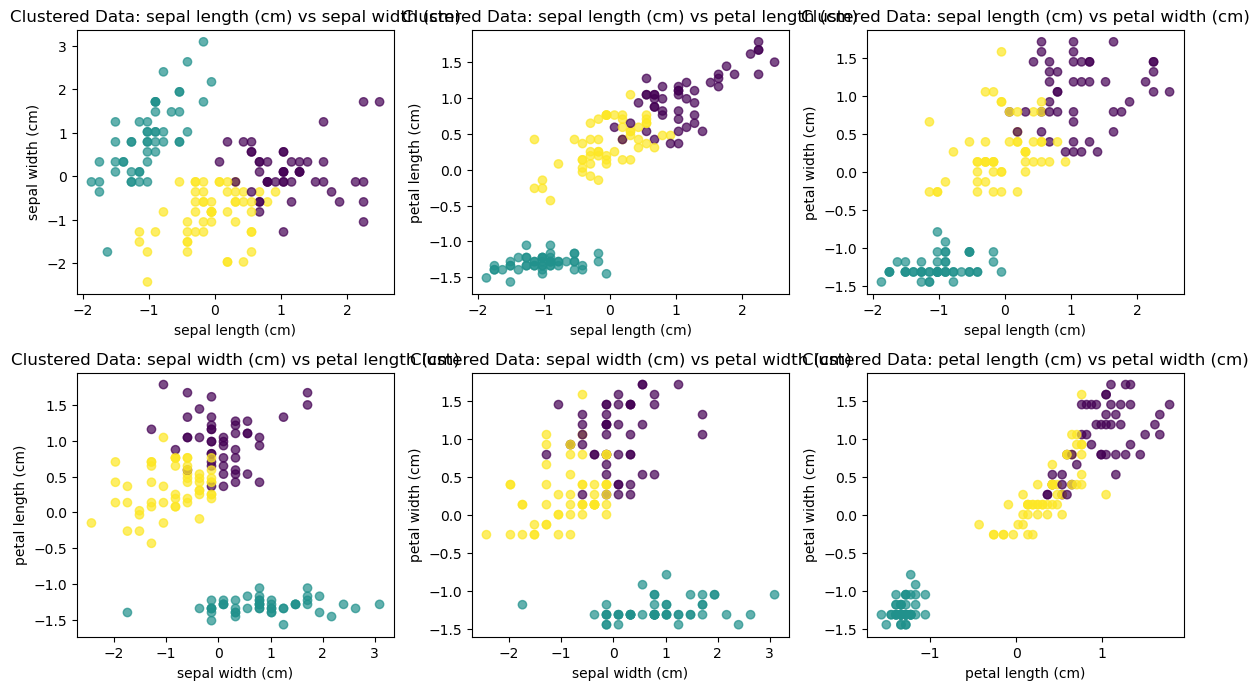

In [15]:

# Use the helper function to plot scatter plots, colored by cluster labels
plot_feature_pairs(clustered_iris_data, feature_names, color_labels=clustered_iris_data['Cluster'], title_prefix='Clustered Data: ')

We chose `k=3` for the number of clusters arbitrarily. However, in a real-world scenario, it is important to determine the optimal number of clusters using appropriate methods.

**Question**: What is one method commonly used to determine the optimal number of clusters in K-means clustering, and why is this method helpful?

One of the method to find the optimal number of clusters is named elbow method. It is helpful because it helps find the point where increasing the number of clusters no longer leads to a significant reduction in WSSD (Within-Cluster Sum of Squared Distances)

In [26]:
iris_clust_ks = pd.DataFrame(columns=["k","wssd"])
for k in range (1,13):
    elbow_kmeans = KMeans(n_clusters=k, random_state=123)
    elbow_kmeans.fit(scaled_iris_df)

    iris_clust_ks =pd.concat([iris_clust_ks, pd.DataFrame({"k":k, "wssd":[elbow_kmeans.inertia_]})], ignore_index = True)
 #penguin_clust_ks = pd.concat([ penguin_clust_ks, pd.DataFrame({"k": [k], "wssd": [elbow_kmeans.inertia_]}) ], ignore_index=True)
iris_clust_ks



c:\Users\tinti\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tinti\AppData\Local\Temp\ipykernel_18736\2544213358.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  iris_clust_ks =pd.concat([iris_clust_ks, pd.DataFrame({"k":k, "wssd":[elbow_kmeans.inertia_]})], ignore_index = True)
c:\Users\tinti\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availab

,k,wssd
0,1,600.000000
1,2,222.361705
2,3,139.820496
3,4,114.412562
4,5,105.079358
5,6,82.522775
6,7,72.770632
7,8,62.586368
8,9,59.696974
9,10,54.783980


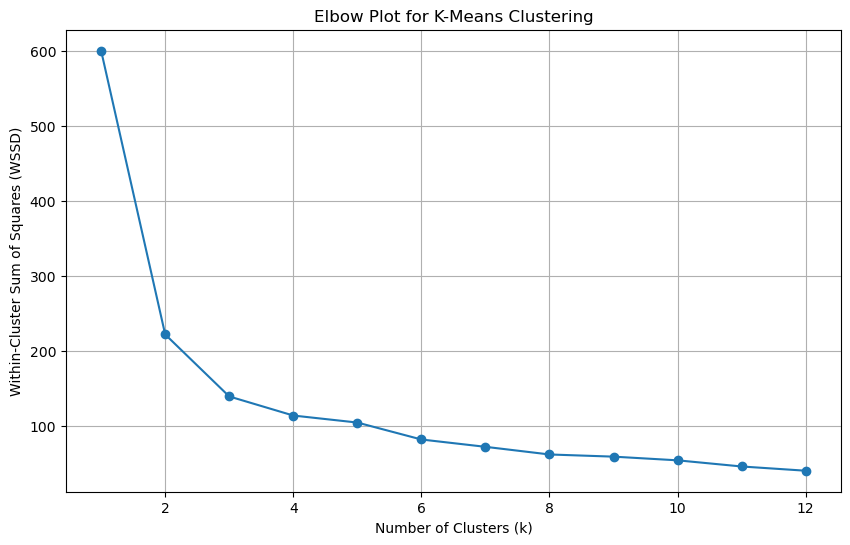

In [33]:
# Create the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(iris_clust_ks["k"], iris_clust_ks["wssd"], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSSD)')
plt.title('Elbow Plot for K-Means Clustering')
#plt.xticks(iris_clust_ks["k"])  # Optional: to ensure all k values are shown on the x-axis
plt.grid(True)
plt.show()

It shows K=3 is optimal

#### **Question 5:** 
#### Bootstrapping 

Implement bootstrapping on the mean of Petal Width. Generate 10000 bootstrap samples, calculate the mean for each sample, and compute a 90% confidence interval.

In [95]:
# check the mean of the full dataset avaialble
#mean_petal_width = clustered_iris_data["petal width (cm)"].mean()
#mean_petal_width

In [86]:
# create one sample from the dataset with 50 listings and calculate the mean
np.random.seed(123)
one_sample = clustered_iris_data.sample(n=50)
mean_petal_width = one_sample["petal width (cm)"].mean()
mean_petal_width

-0.07546911899310675

In [87]:
# create 10000 bootstrap samples
bootstrap_samples = []

for i in range(10000):
    sample = one_sample.sample(frac=1, replace=True)
    sample = sample.assign(replicate=i)
    bootstrap_samples.append(sample)

boot10000 = pd.concat(bootstrap_samples)
boot10000

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster,replicate
135,2.249683,-0.131979,1.331133,1.448832,0,0
87,0.553333,-1.743357,0.364896,0.132510,2,0
112,1.159173,-0.131979,0.990108,1.185567,0,0
130,1.886180,-0.592373,1.331133,0.922303,0,0
87,0.553333,-1.743357,0.364896,0.132510,2,0
...,...,...,...,...,...,...
72,0.553333,-1.282963,0.649083,0.395774,2,9999
37,-1.143017,1.249201,-1.340227,-1.447076,1,9999
143,1.159173,0.328414,1.217458,1.448832,0,9999
143,1.159173,0.328414,1.217458,1.448832,0,9999


In [88]:
# get the mean petal width for each bootstrap sample
boot_means = boot10000.groupby("replicate")["petal width (cm)"].mean().reset_index(name = 'mean_petal_width')
boot_means

,replicate,mean_petal_width
0,0,0.253611
1,1,0.090387
2,2,0.006143
3,3,-0.346631
4,4,-0.025449
...,...,...
9995,9995,-0.201836
9996,9996,0.019306
9997,9997,0.079857
9998,9998,-0.199203


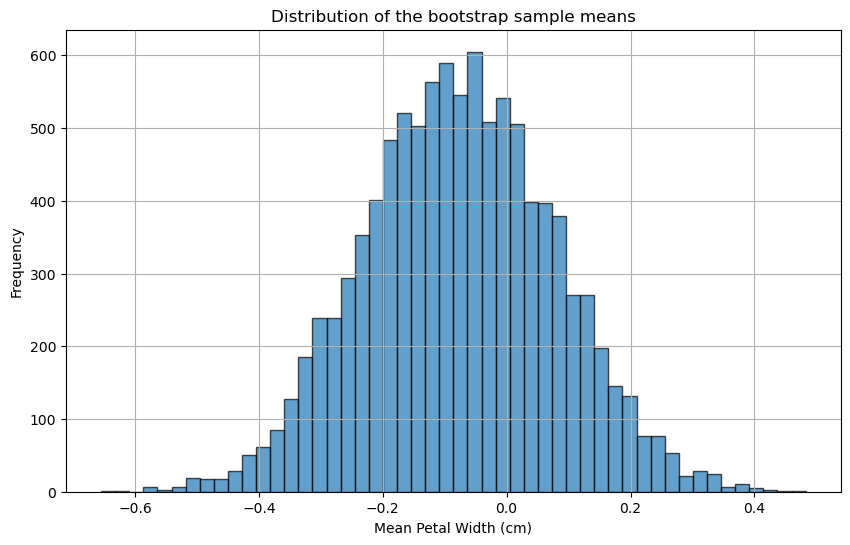

In [94]:
# Plot the histogram of the bootstrap distribution
plt.figure(figsize=(10, 6))
plt.hist(boot_means['mean_petal_width'], bins=50, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Distribution of the bootstrap sample means')
plt.xlabel('Mean Petal Width (cm)')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()

In [90]:
# calculate the 90% confidence interval for the mean petal width

lower_bound = boot_means["mean_petal_width"].quantile(0.05)
lower_bound

-0.32557026914467835

In [91]:
upper_bound = boot_means["mean_petal_width"].quantile(0.95)
upper_bound

0.1772646748442709

In [92]:
# Display the result
print(f"Mean of Petal Width: {mean_petal_width}")
print(f"90% Confidence Interval of Mean Petal Width: ({lower_bound}, {upper_bound})")

Mean of Petal Width: -0.07546911899310675
90% Confidence Interval of Mean Petal Width: (-0.32557026914467835, 0.1772646748442709)


**Question:**
- Why do we use bootstrapping in this context? What does it help us understand about the mean?

We use booststrapping to understand the variablility and confidence intervals of the petal width mean we estimated from our sample (ie. point estimate). Since the population distribution is unknown and sample size is small,  boostrapping can help access how reliable our analysis and understand the range of possible values for the calculated mean.

**Question:**
- What is the purpose of calculating the confidence interval from the bootstrap samples? How does it help us interpret the variability of the estimate?

The confidence interval tells us if we took 50 samples, the true mean will fall within -0.33 and 0.18 , 90% of the time. 

**Question:**

- Reflect on the variability observed in the bootstrapped means and discuss whether the mean of the Petal Width appears to be a stable and reliable estimate based on the confidence interval and the spread of the bootstrapped means.

The bootstrap distribution is a bell shape and centered around -0.1 mean petal width. It appears our estimate of -0.75 mean petal width is a reliable estimate base on the 90% confidence interval.

# Criteria


| **Criteria**                                           | **Complete**                                      | **Incomplete**                                    |
|--------------------------------------------------------|---------------------------------------------------|--------------------------------------------------|
| **Data Inspection**                                    | Data is thoroughly inspected for the number of variables, observations, and data types, and relevant insights are noted. | Data inspection is missing or lacks detail.         |
| **Data Visualization**                                 | Visualizations (e.g., scatter plots) are well-constructed and correctly interpreted to explore relationships between features and species. | Visualizations are poorly constructed or not correctly interpreted. |
| **Clustering Implementation**                           | K-Means clustering is correctly implemented, and cluster labels are appropriately assigned to the dataset.            | K-Means clustering is missing or incorrectly implemented. |
| **Bootstrapping Process**                              | Bootstrapping is correctly performed, and results are used to assess variable mean stability. | Bootstrapping is missing or incorrectly performed. |

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `11:59 PM - 01/26/2025`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/LCR/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-4-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
